<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/UN_decade_banner.png' align='right' width='100%'/>

<a href="../../../Index.ipynb"><< Index</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2022 EUMETSAT <br>
**License:** MIT <br>
**Authors:** B. Loveday (Innoflair UG / EUMETSAT), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2Focean-case-studies/HEAD?urlpath=%2Ftree%2FCase_studies%2FUN_Ocean_Decade%2FChallenge02_ecosystems_and_biodiversity%2FMarine_heatwaves_intensification_threatens_coral_reef_health.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following prerequisites:
- **<a href="https://eoportal.eumetsat.int/" target="_blank">A EUMETSAT Earth Observation Portal account</a>** to download data from the EUMETSAT Data Store
- **<a href="https://my.wekeo.eu/user-registration" target="_blank">A WEkEO account</a>** to download from WEkEO
    
There are no prerequisite notebooks for this module, but you may wish to look at the following notebooks on using SLSTR data; <br>
- **<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/sensors/learn-SLSTR" target="_blank">Learn SLSTR (EUMETSAT Gitlab)</a>**

For more contextual information, users should refer to the following case study where the image we generate here is published:
- **<a href="https://www.eumetsat.int/Marine-heatwave-intensification-threatens-coral-reef-health" target="_blank">Marine heatwave intensification threatens coral reef health</a>**

</div>
<hr>

# Marine heatwave intensification threatens coral reef health
<font color="#138D75">**UN Ocean Decade Challenge 2: Protect and restore ecosystems and biodiversity**</font>

### Data used

| Product Description | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Sentinel-3 SLSTR level-2 | EO:EUM:DAT:0412 | <a href="https://navigator.eumetsat.int/product/EO:EUM:DAT:SENTINEL-3:SL_2_SST?query=SLSTR&s=advanced" target="_blank">link</a> | EO:EUM:DAT:SENTINEL-3:SL_2_WST___ | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AEUM%3ADAT%3ASENTINEL-3%3ASL_2_WST___&initial=1" target="_blank">link</a> |
| Global OSTIA SST (Reprocessed) | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_011" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* download SLSTR Level-2 SST products from the EUMETSAT Data Store
* spatially plot SLSTR data for the Great Barrier Reef (GBR) region
* download OSTIA reprocessed SST data from WEkEO using the harmonised data access (HDA) API
* make a "climate stripes" plot over the GBR region
* check for marine heat waves in the GBR region

### Outline

Concurrent with the past century's persistent warming of global oceans, marine heatwaves (periods of extreme regional ocean warming) have become more frequent and more extreme (Laufkötter et al., 2020). They occur in many areas around the world, from the Pacific Ocean to the Atlantic Ocean to the Mediterranean Sea and threaten marine biodiversity and its ecosystems (Smale et al., 2019). One particular ecosystem impacted by marine heatwaves, are coral reefs. These heatwaves can, for example, cause coral bleaching, coral disease outbreaks, and/or algae blooms (Roberts et al., 2019). Although coral can survive these so-called bleaching events, they become more stressed, more susceptible to diseases, and, on the long-term, subject to mortality (NOAA, 2021).

In this notebook we will work through an example of how you can access near-real-time data to view current SST in a region that is often affected by marine heatwaves. We will then look at this area in a long term context using a reprocessed time series, to see how the current situation compares to historical marine heat wave episodes.

This Jupyter Notebook builds on the **<a href="https://www.eumetsat.int/Marine-heatwave-intensification-threatens-coral-reef-health" target="_blank">Marine heatwave intensification threatens coral reef health</a>** case study, and will replicate the figures 3, 5 and 6 using Level-2 data from the Copernicus Sentinel-3 SLSTR sensor and Level-4 data from the Level-4 global OSTIA record. You can find more information on these in the links above.

As part of the **<a href="https://www.oceandecade.org/" target="_blank">United Nations Ocean Decade</a>**, ten specific challenges are being addressed. This work, and the data underlying it, support "Challenge 2 - Protect and restore ecosystems and biodiversity". Data on marine heatwaves can help characterise the stressors facing marine ecosystems under climate changes, and contribute to decision making to protect, manage and restore those affected.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>
    
 1. [Acquiring SLSTR data from the EUMETSAT Data Store](#section1)
 1. [Plotting SLSTR data spatially](#section2)
 1. [Downloading OSTIA SST data from the Copernicus Marine Service (CMEMS)](#section3)
 1. [Preparing the OSTIA data](#section4)
 1. [Making SST-based climate stripes](#section5)
 1. [Testing for marine heatwaves](#section6)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../README.md" target="_blank">README</a>**.

In [1]:
import cartopy.crs as ccrs      # a library that supports mapping and projection
import cartopy.feature as ccf   # a cartopy extension that support adding features, e.g. coastlines
import datetime                 # a library that allows us to work with dates and times
import glob                     # a package that helps with file searching
import json                     # a library that helps us make JSON format files
import matplotlib.pyplot as plt # a library the provides plotting capability
from matplotlib import gridspec # a library the provides plotting capability
import netCDF4 as nc            # a library the supports netCDF file read/write
import numpy as np              # a library that lets us work with arrays; we import this with a new name "np"
import os                       # a library that allows us access to basic operating system commands
from shapely import geometry    # a library that support construction of geometry objects
import shutil                   # a library that allows us access to basic operating system commands like copy
import sys                      # a library that gives us access to OS system functions
import xarray as xr             # a powerful library that helps us work efficiently with multi-dimensional arrays
import zipfile                  # a library that allows us to unzip zip-files.
import eumartools               # a library that helps us work with Sentinel-3 data
import eumdac                   # a tool that helps us download via the eumetsat/data-store
import motuclient               # a library to help us access CMEMS data

The following library supports the detection of marine heat waves. More information is available at the following links:

- **<a href="https://github.com/coecms/xmhw" target="_blank">The imported package</a>**
- **<a href="https://github.com/ecjoliver/marineHeatWave" target="_blank">The original development package by Eric Oliver (not imported here)</a>**
- **<a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057?casa_token=k4Z_r0jQNNkAAAAA:Z1aQSNHpiGFC0OJMYfmCuCGCQ_DOqymmhwz0FWDChKh_nsCrm1WKGNWfsBH7CzwKpWUCfDbPXSw" target="_blank">The supporting reference (Hobday et al., 2016)</a>**

In [2]:
from xmhw.xmhw import detect, threshold

We will also create a directory to download our data to. We will be downloading ~3 Gb worth of Level-2 SLSTR SST products and CMEMS OSTIA reprocessed SST products. We will process some of this "on the fly" to reduce local space requirements. The output of this processing will be stored in the `precomputed` directory, which we will also create below.

In [3]:
# Create a download and precomputed directory for our SLSTR and CMEMS products
download_dir = os.path.join(os.getcwd(), "products")
os.makedirs(download_dir, exist_ok=True)

precomputed_dir = os.path.join(os.getcwd(), "precomputed")
os.makedirs(precomputed_dir, exist_ok=True)

Next, we define a switch that determines if we should download new data. If `download_data = False` the notebook will look for existing, locally processed data, saving us time if we run more than once. By default this is set to true, assuming that the notebook has not yet been run.

We will also define a regions over which to plot our SLSTR SST products and extract our OSTIA SST data. The sub-sampling parameter allows us to reduce the SLSTR grid, which may be necessary if you are running on a memory limited environment.

In [4]:
# Should we download new data?
download_data = True

# plot region for SLSTR data: W, E, S, N
plot_region = [142, 156, -25, -10]

# sub-sampling for SLSTR pre-processing: default = 1 implies no subsampling 
plot_data_subsample = 1

# OSTIA MHW region E, S, W, N
MHW_region = [142, -21, 152, -11]
start_year, end_year, iter_year = [1992, 2021, 5]

<div class="alert alert-warning" role="alert">

## <a id='section0'></a>0. Supporting functions
[Back to top](#TOC_TOP)

</div>

Before we begin, we will define two short functions. One manages the pre-processing of our SLSTR data. This will extract only the variables we need (sea_surface_temperature, sses_bias, quality_level) only over the region we defined above, and applying our subsampling as required. Later, we will call this function as part of our download process.

In [5]:
def process_SST_granule(SST_file, region, subsample=1, quality_level=4):
    """
    Quick function to process Level-2 SLSTR granules for memory management. 
    Regionally subsets, applies bias and masks out values lower than the quality level.

    Args:
        SST_file (string)        : the file to process
        region (list)            : the area subset to use when extracting data
        subsample (int)          : the grid subsampling parameter
        quality_level (int)      : the quality level to flag SLSTR data at. Anything lower than this value 
                                   will be discarded
    Returns:
        lon (array)              : the extracted longitude
        lat (array)              : the extracted latitude
        bias_corr_QC_SST (array) : the extracted, bias corrected, quality flagged SST

    """
    SST_data = xr.open_dataset(SST_file)
    ext_x, ext_y, ext_mask = eumartools.subset_image(SST_data["lon"], SST_data["lat"], 
                                             [region[0], region[1], region[1], region[0]],
                                             [region[2], region[2], region[3], region[3]],
                                             mode='global')
    
    bias_corr_QC_SST = np.array(SST_data["sea_surface_temperature"] + SST_data["sses_bias"] - 273.15)
    bias_corr_QC_SST[np.array(SST_data["quality_level"]) < 4] = np.nan
    
    lon = np.squeeze(np.array(SST_data["lon"]))[np.nanmin(ext_y):np.nanmax(ext_y):subsample,
                                                np.nanmin(ext_x):np.nanmax(ext_x):subsample]
    lat = np.squeeze(np.array(SST_data["lat"]))[np.nanmin(ext_y):np.nanmax(ext_y):subsample,
                                                np.nanmin(ext_x):np.nanmax(ext_x):subsample]
    bias_corr_QC_SST = np.squeeze(bias_corr_QC_SST)[np.nanmin(ext_y):np.nanmax(ext_y):subsample,
                                                    np.nanmin(ext_x):np.nanmax(ext_x):subsample]
    SST_data.close()

    return lon, lat, bias_corr_QC_SST

The other defines a class that helps us get data from the CMEMS catalogue

In [6]:
class MotuOptions:
    """
    A class that helps us create an object for interfacting with the CMEMS catalogue
    """
    def __init__(self, attrs: dict):
        super(MotuOptions, self).__setattr__("attrs", attrs)

    def __setattr__(self, k, v):
        self.attrs[k] = v

    def __getattr__(self, k):
        try:
            return self.attrs[k]
        except KeyError:
            return None

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Acquiring SLSTR data from the EUMETSAT Data Store
[Back to top](#TOC_TOP)

</div>

We are going to retrieve the SLSTR data from the EUMETSAT Data Store. Collections are stored according to their `collection id`, which for SLSTR Level-2 products is `EO:EUM:DAT:0412` (as specified in the *Data Used* section above).

In [7]:
collection_id = 'EO:EUM:DAT:0412'

 We will also provide the relevant products we want from this collection, stored in `product_list`, which in this case is four granules corresponding to night-time SST over the eastern tropical pacific. For more information on how to search for the data you want, please see the Learn SLSTR Gitlab link above.

In [8]:
product_list = [
'S3A_SL_2_WST____20211222T123736_20211222T141835_20211223T225541_6059_080_066______MAR_O_NT_003.SEN3',
'S3B_SL_2_WST____20211222T115815_20211222T133915_20211223T224804_6059_060_308______MAR_O_NT_003.SEN3'
]

To access Sentinel-3 data from the <a href="https://data.eumetsat.int">EUMETSAT Data Store</a>, we will use the EUMETSAT Data Access Client (`eumdac`). If you are working with the recommended Anaconda Python distribution and used the supplied environment file (environment.yml) to build this python environment (as detailed in the README), you will already have installed this. If not, you can install eumdac using;

`conda install -c eumetsat eumdac`

However, you can also find the source code on the <a href="https://gitlab.eumetsat.int/eumetlab/data-services/eumdac">EUMETSAT gitlab</a>. Please visit the EUMETSAT user support confluence spaces for the the <a href="https://eumetsatspace.atlassian.net/wiki/spaces/DSDS/overview">Data Store</a> and <a href="https://eumetsatspace.atlassian.net/wiki/spaces/EUMDAC/overview">eumdac</a> for more information.

In order to allow us to download data from the Data Store via API, we need to provide our credentials. We can do this in two ways; either by creating a file called `.eumdac_credentials` in our home directory (*option 1 - recommended*) or by supplying our credentials directly in this script (*option 2*). 

<div class="alert alert-block alert-success">

#### Option 1: creating  `.eumdac_credentials` in your home directory

For most computer systems the home directory can be found at the path \user\username, /users/username, or /home/username depending on your operating system.

In this file we need to add the following information exactly as follows;

```
{
"consumer_key": "<your_consumer_key>",
"consumer_secret": "<your_consumer_secret>"
}
```

You must replace `<your_consumer_key>` and `<your_consumer_secret>` with the information you extract from https://api.eumetsat.int/api-key/. You will need a <a href="https://eoportal.eumetsat.int/">EUMETSAT Earth Observation Portal account</a> to access this link, and in order to see the information you must click the "Show hidden fields" button at the bottom of the page.

*Note: your key and secret are permanent, so you only need to do this once, but you should take care to never share them*

Make sure to save the file without any kind of extension. Once you have done this, you can read in your credentials using the commands in the following cell with `file_credentials = True`. These credentials will be used to generate a time-limited token, which will refresh itself when it expires.
    
</div>
    
<div class="alert alert-danger" role="alert">

#### Option 2: Generating a token directly by entering your key and secret in the notebook as follows*
   
Alternatively you can enter your credentials directly in the notebook by updating the following line with your user specifi information and setting `file_credentials = False`.

```
token = eumdac.AccessToken(("consumer_key", "consumer_secret"))
```

However, while this method is convenient in the short term, but is not really recommended as you have to put your key and secret in this notebook, and run the risk of accidentally sharing them. This method also requires you to authenticate on a notebook-by-notebook basis.
    
<div>

In [9]:
# load credentials
file_credentials = True

if file_credentials == True:
    with open(os.path.join(os.path.expanduser("~"),'.eumdac_credentials')) as json_file:
        credentials = json.load(json_file)
        token = eumdac.AccessToken((credentials['consumer_key'], credentials['consumer_secret']))
        print(f"This token '{token}' expires {token.expiration}")
else:
    # see below for more information
    token = eumdac.AccessToken(("consumer_key", "consumer_secret"))

This token 'c7d87b74-cdff-315f-955c-8eb6908d254f' expires 2022-09-19 11:18:11.161771


Now we have a token, we can create an instance of the EUMETSAT Data Store.

In [10]:
datastore = eumdac.DataStore(token)

We can use this instance to search for products, but in our case we already know the ones we want (as listed in `products_list`), so we can download them directly. Once we have downloaded a granule, we will also subset the file and strip out any variables we don't need to save local storage space. This will be stored in the `precomputed` directory.

In [11]:
if download_data:
    for product in product_list:
        selected_product = datastore.get_product(product_id=product, collection_id=collection_id)
        print(f"Downloading and unzipping:\n>> {product}")

        with selected_product.open() as fsrc, open(os.path.join(download_dir, fsrc.name), mode='wb') as fdst:
            shutil.copyfileobj(fsrc, fdst)

        with zipfile.ZipFile(fdst.name, 'r') as zip_ref:
            for file in zip_ref.namelist():
                if file.startswith(str(product)):
                    zip_ref.extract(file, download_dir)

        # remove zip file
        os.remove(fdst.name)

        # process downloaded file
        SST_file = glob.glob(os.path.join(download_dir, product, "*.nc"))[0]
        OUT_file = os.path.join(precomputed_dir, product.replace('.SEN3','_subset.nc'))
        lon, lat, sst = process_SST_granule(SST_file, plot_region, subsample=plot_data_subsample)

        # write to new netCDF file
        ds = xr.Dataset({"sst": (("x", "y"), sst)},
                        coords={"lat": (("x", "y"), lat), 
                                "lon": (("x", "y"), lon)})
        ds.to_netcdf(OUT_file, format='NETCDF4_CLASSIC')

        # remove full size download
        shutil.rmtree(os.path.join(download_dir, product))

>> S3A_SL_2_WST____20211222T123736_20211222T141835_20211223T225541_6059_080_066______MAR_O_NT_003.SEN3
>> S3B_SL_2_WST____20211222T115815_20211222T133915_20211223T224804_6059_060_308______MAR_O_NT_003.SEN3


/Users/benloveday/opt/anaconda3/envs/cmts_ocean_case_studies/lib/python3.9/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in arccos
  result_data = func(*input_data)


<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Plotting SLSTR data spatially
[Back to top](#TOC_TOP)

</div>

Lets start by collecting our download Level-2 SLSTR SST products...

In [12]:
# get the files
SLSTR_files = glob.glob(os.path.join(precomputed_dir, '*.nc'))

Now we can iterate through the images and plot them. The box below will set up our plot and do this for us. This will be the same as figure 3 on the case study. This code cell looks complex, but most of it is related to setting up our figure and embellishing our plot. Each section has a short comment describing what is done.

*Note:  Note that this routine does not perform any binning, so newer data is just overlaid. The result is NOT a Level-3 product, but a level 2 mosaic*

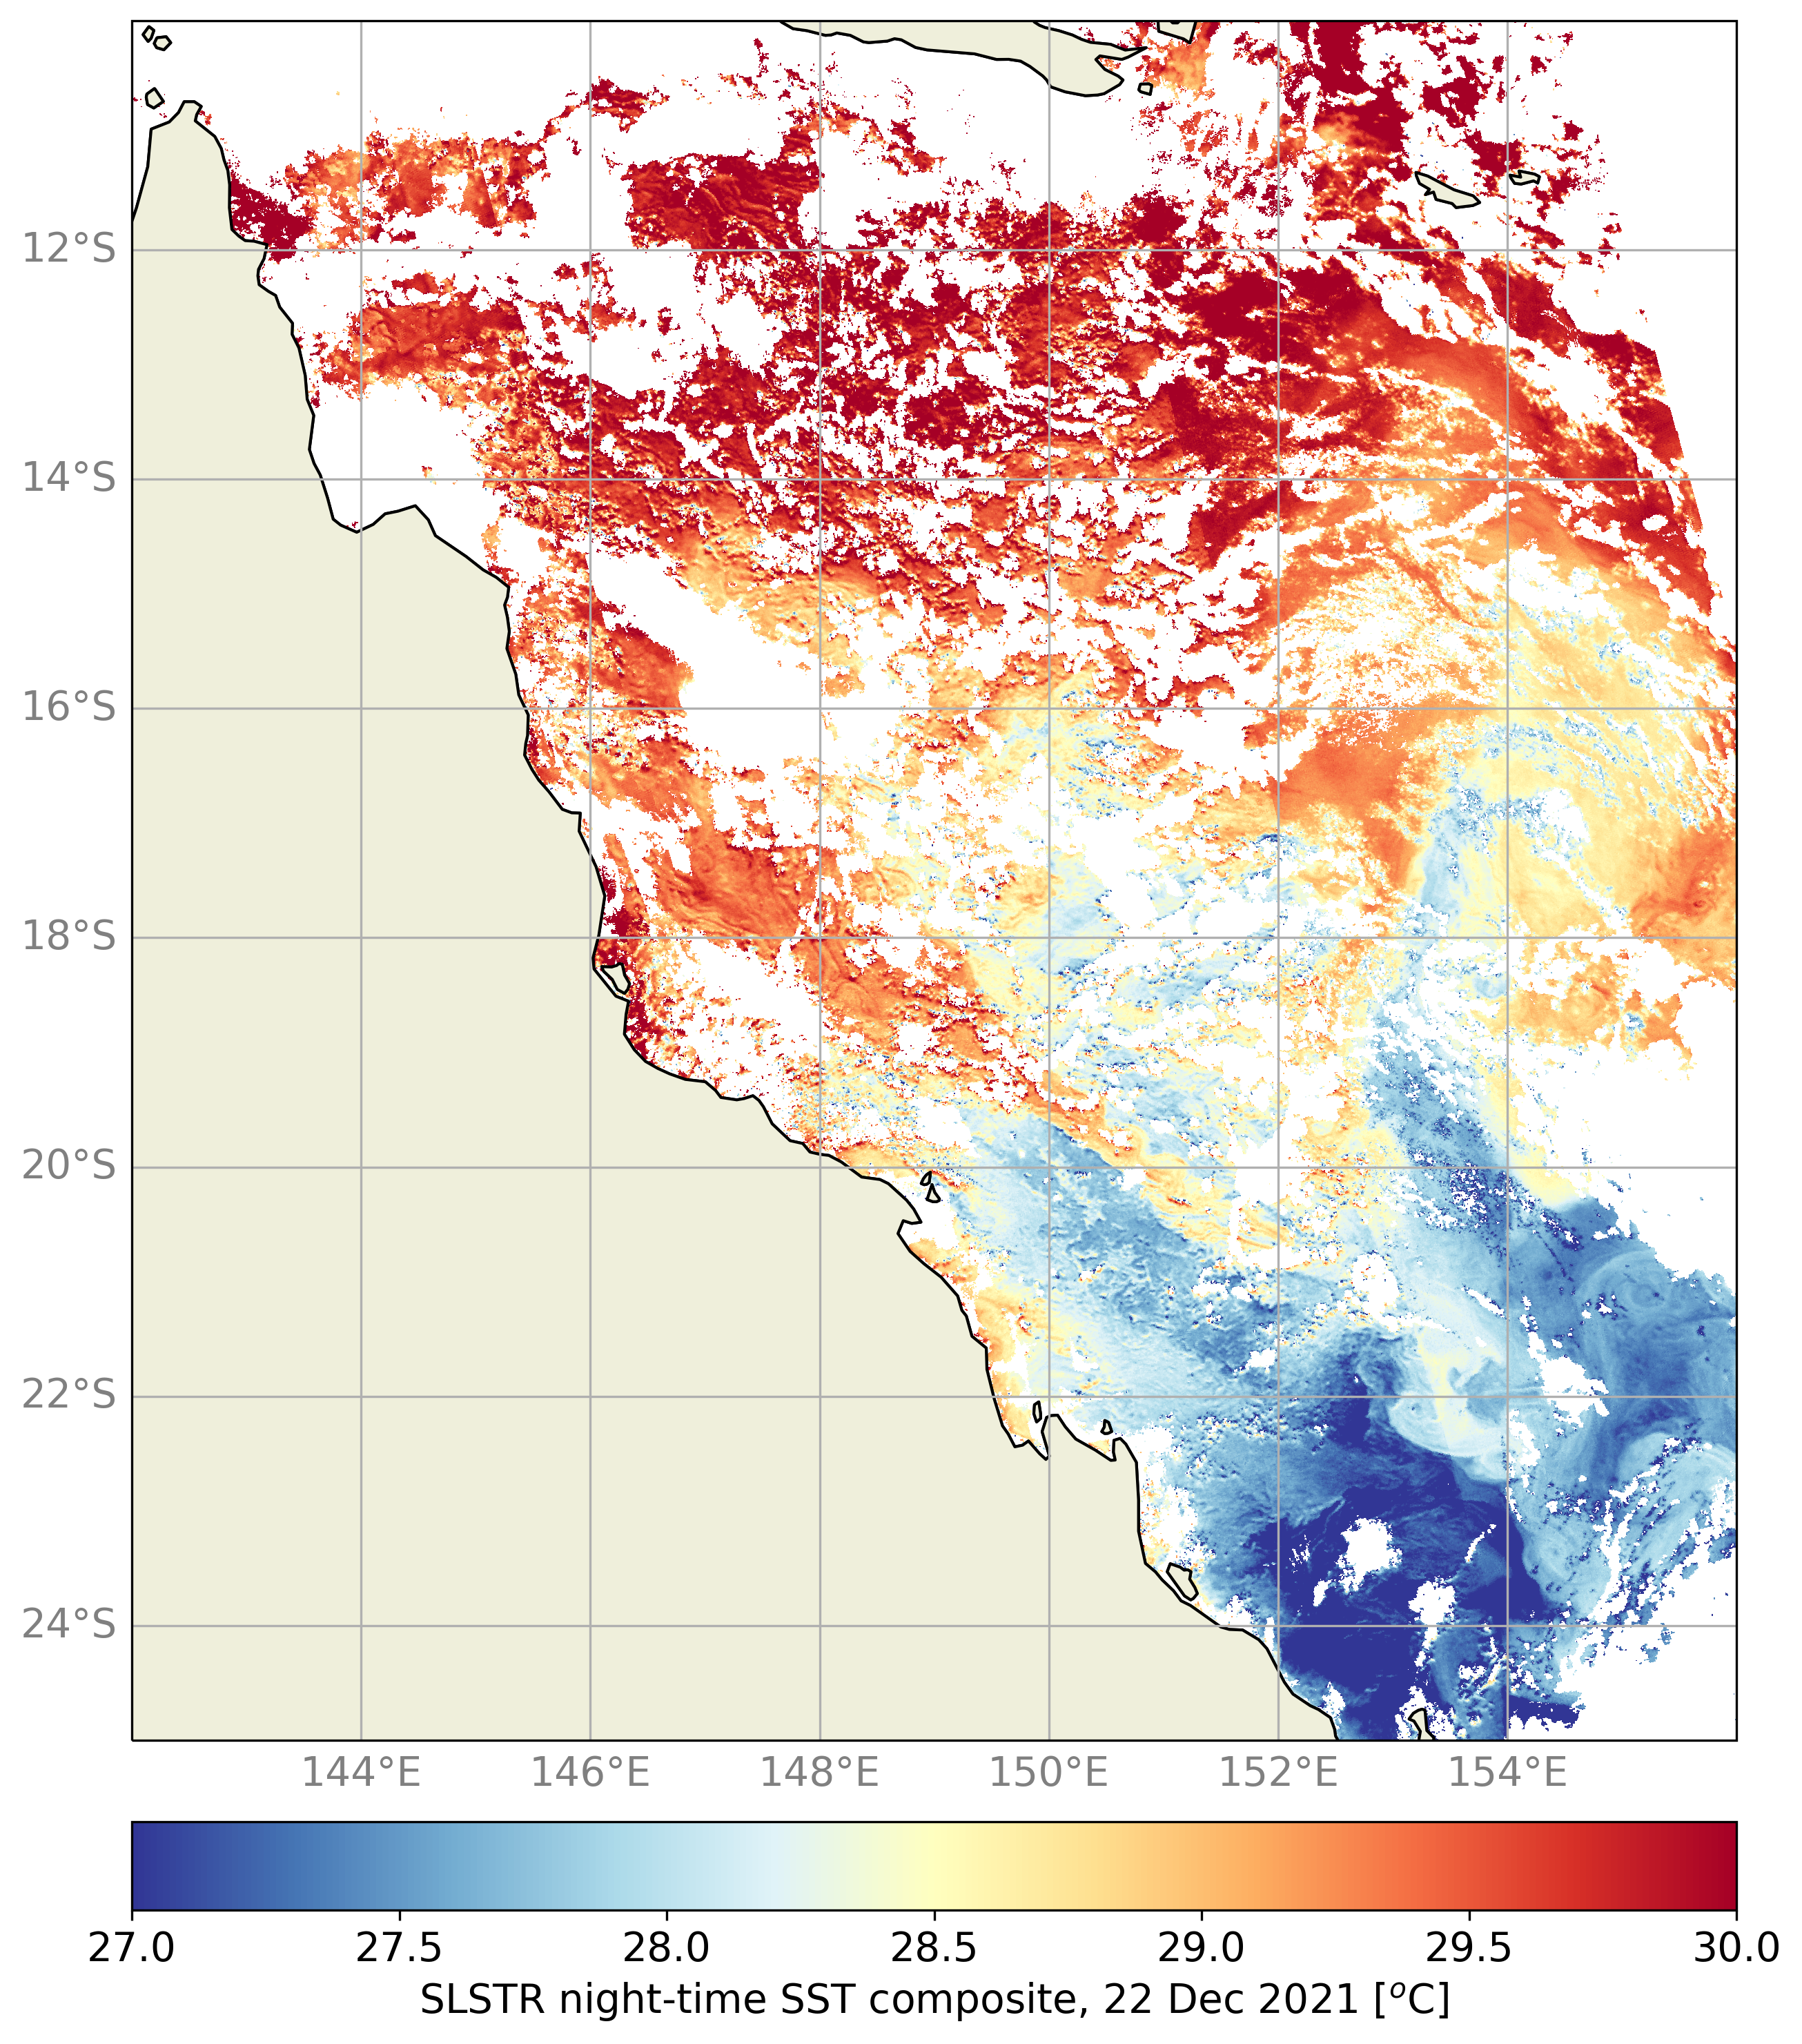

In [13]:
# setup figure
fig = plt.figure(figsize=(10, 12), dpi=300)
plt.rc('font', size=14)

# setup axes
gs = gridspec.GridSpec(3, 1, height_ratios=[20,0.5,1])
gs.update(wspace=0.01, hspace=0.01)

# setup plot 1: the composite
axes_m = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
axes_m.set_extent(plot_region)

# make the plot: we will call this as a function as it contains a 'for' loop to iterate over our SLSTR granules.
for SLSTR_file in SLSTR_files:
    # plot the SST field
    SST_data = xr.open_dataset(SLSTR_file)
    p1 = axes_m.pcolormesh(SST_data["lon"], SST_data["lat"],
                           SST_data["sst"], cmap=plt.cm.RdYlBu_r,\
                           vmin=27, vmax=30, zorder=-1)
    SST_data.close()

# add some map final embelishments
axes_m.coastlines(resolution='50m', color='black', linewidth=1)
axes_m.add_feature(ccf.NaturalEarthFeature('physical', 'land', '50m',
                                         edgecolor='k', facecolor=ccf.COLORS['land']))
g1 = axes_m.gridlines(draw_labels = True)
g1.top_labels = g1.right_labels = False
g1.xlabel_style = g1.ylabel_style = {'color': 'gray'}

# setup plot2: colorbar
axes_c = plt.subplot(gs[2,0])
cbar = plt.colorbar(p1, cax=axes_c, orientation='horizontal')
cbar.ax.tick_params() 
cbar.set_label('SLSTR night-time SST composite, 22 Dec 2021 [$^{o}$C]')
plt.savefig('SLSTR_composite_22122021.png', bbox_inches='tight')

<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Downloading OSTIA SST data from the Copernicus Marine Service (CMEMS)
[Back to top](#TOC_TOP)

</div>

To place the image above in context we'll need to look at a time series of data. For this we can access data from the Copernicus services, where multiple data sources (different satellites etc) are combined to produce data sets that cover longer time periods. In this case we are going to look at the OSTIA Sea Surface Temperature using both the NRT and reprocessed data streams, so we can look at data right up to the time period of the SLSTR images we looked at previously.

Reprocessed and NRT data streams are produced separately and we must be careful when we interpret these data sets together. As time progresses, we understand better how satellite instruments perform, algorithms improve, and data is reprocessed to ensure good quality and consistency between sources. With NRT we do not have all the information we have in hindsight, particularly about instrument characterisation, but this data is vitally important for understanding events that are happening right now. So, for example, you would not use combined NRT and reprocessed data sets for long-term trend analysis, and you would want to consider NRT measurements with a higher degree of uncertainty that you might consider with reprocessed data. So whilst we can use the NRT data now to get an indication of whether this is event is looking like it might be significant, we would eventually want to use a longer term time series that have been reprocessed, to establish how unusual this is event is in a more climatic context.

We will construct and submit a query to the CMEMS catalogue. To do this, we need to authorise the service. We will do this in the same way as we authorised `eumdac` above; either via a file in your home directory called *.cmems_credentials* or by directly entering your username and password. If you don't have a CMEMS account, you can request one **<a href="https://resources.marine.copernicus.eu/registration-form" target="_blank">here</a>**.

In [14]:
# load credentials
file_credentials = True

if file_credentials == True:
    with open(os.path.join(os.path.expanduser("~"),'.cmems_credentials')) as json_file:
        credentials = json.load(json_file)
else:
    # see below for more information
    credentials = {}
    credentials["username"] = "<YOUR_CMEMS_USERNAME>"
    credentials["password"] = "<YOUR_CMEMS_PASSWORD>"

We'll define a dictionary that will hold all of the information we need for this query; the *service_id*, *product_id*, *region* of interest, and *variables* we want.

In [15]:
options = {}
options["service_id"] = "SST_GLO_SST_L4_REP_OBSERVATIONS_010_011-TDS"
options["product_id"] = "METOFFICE-GLO-SST-L4-REP-OBS-SST"
options["longitude_min"], options["longitude_max"], options["latitude_min"], options["latitude_max"] = plot_region
options["variable"] = ["analysed_sst"]
options["date_min"] = None
options["date_max"] = None
options["motu"] = "https://my.cmems-du.eu/motu-web/Motu"
options["auth_mode"] = "cas"
options["out_dir"] = download_dir
options["out_name"] = None
options["user"] = credentials["username"]
options["pwd"] = credentials["password"]

In order to avoid any limit on the size of data we request, we will download in 5-year blocks. To do this, we will take our template (defined above) and run it in a loop that updates our "tags" (*date_min/date_max/out_name*') with the relevant datas/areas for our requests.

In [16]:
if download_data:
    for START_YEAR in range(start_year, end_year, iter_year):
        options["date_min"] = f"{str(START_YEAR)}-01-01T12:00:00.000Z"
        options["date_max"] = f"{str(START_YEAR + iter_year - 1)}-12-31T12:00:00.000Z"
        options["out_name"] = f'OSTIA_SST_{START_YEAR}_{START_YEAR + iter_year - 1}.nc'
        print(f'From: {options["date_min"]}')
        print(f'To:   {options["date_max"]}')
        r = motuclient.motu_api.execute_request(MotuOptions(options))

From: 1992-01-01T12:00:00.000Z
To:   1996-12-31T12:00:00.000Z
From: 1997-01-01T12:00:00.000Z
To:   2001-12-31T12:00:00.000Z
From: 2002-01-01T12:00:00.000Z
To:   2006-12-31T12:00:00.000Z
From: 2007-01-01T12:00:00.000Z
To:   2011-12-31T12:00:00.000Z
From: 2012-01-01T12:00:00.000Z
To:   2016-12-31T12:00:00.000Z
From: 2017-01-01T12:00:00.000Z
To:   2021-12-31T12:00:00.000Z


<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Preparing the OSTIA data
[Back to top](#TOC_TOP)

</div>

We will do a bit or preprocessing on the OSTIA data to make it easier to use for our purposes. We begin by opening the data, then calculate spatial averages, annual values, and then, from these an SST anomaly. The `xarray` library allows us to open all the downloaded files at once!

In [17]:
SST_data = xr.open_mfdataset(glob.glob(os.path.join(download_dir,'OSTIA_*.nc')))
SST_spatial_average = SST_data.mean(dim='lat').mean(dim='lon')
SST_annual_values = SST_spatial_average.groupby('time.year').mean('time')
SST_anomaly = SST_annual_values["analysed_sst"] - SST_annual_values["analysed_sst"].mean(dim="year")

<div class="alert alert-info" role="alert">

## <a id='section5'></a>5. Making SST-based climate stripes
[Back to top](#TOC_TOP)

</div>

The next plot we'll make, shows ‘stripes’ of the average sea surface temperature anomaly for our region of interest. Recently, ‘climate stripes’ have been used by 'citizen scientists' all over the world to show long-term trends in regional temperatures. The plot below shows a stripes-style graphic derived using the SST time series we have extracted. High anomalies are apparent during 2014, in 2015 during the previous marine heatwave, and were associated with reports in 2019 and 2020.

First we need to do a bit of formatting to get our array in the right size for the plot we want to make. 

In [18]:
SST_stripes = np.squeeze(np.array(SST_anomaly))
SST_stripes_2D = np.repeat(SST_stripes[np.newaxis,...], 2, axis=0)

Now let's plot our stripes...

In [19]:
fig = plt.figure(figsize=(25, 7))
plt.rc('font', size=18)

vmax = np.nanmax(abs(SST_stripes))

date_ticks = []
for ii in range(len(SST_anomaly)):
    date_ticks.append(str(start_year+ii))
    
plt.pcolormesh(SST_stripes_2D, vmin=vmax*-1, vmax=vmax, cmap=plt.cm.RdBu_r)
plt.xticks(np.arange(len(SST_anomaly))+0.5, date_ticks, rotation=90, fontsize=20)
plt.xlim([0,len(SST_anomaly)])
plt.yticks([],[], fontsize=12)
cbar = plt.colorbar()
cbar.set_label('SST anomaly [$^{o}$C]',fontsize=20)
plt.savefig('Climate_stripes_GBR.png', bbox_inches='tight')

<div class="alert alert-info" role="alert">

## <a id='section6'></a>6. Testing for marine heatwaves
[Back to top](#TOC_TOP)

</div>

Next, we're going to do a little bit of analysis to see if we can routinely identify heatwaves in our time series. We can do this using an open toolkit developed for this purpose by Hobday et al., (you can see it imported at the top of this notebook in an xarray based implementation). 

Initially, we need to do some formatting to get the dates for our time series in the right format for ingestion in to the toolkit.

In [20]:
times = [datetime.datetime.strptime(str(i), "%Y-%m-%dT%H:%M:%S.%f000").toordinal() 
           for i in np.asarray(SST_spatial_average["time"])]

doy = [datetime.datetime.strptime(str(i), "%Y-%m-%dT%H:%M:%S.%f000").timetuple().tm_yday - 1
       for i in SST_spatial_average["time"].values]

dates = [datetime.datetime.fromordinal(tt) for tt in times]

Now we can run the analysis, which first establishes a threshold based on the time series and then detects instances where this is exceeded.

In [21]:
SST_time_series = SST_spatial_average["analysed_sst"].load() - 273.15
print(SST_time_series)
clim = threshold(SST_time_series)
mhws = detect(SST_time_series, clim['thresh'], clim['seas'])
rolling_clim_seas = np.array([i for ii in clim['seas'].values[doy] for i in ii])
rolling_clim_thresh = np.array([i for ii in clim['thresh'].values[doy] for i in ii])

<xarray.DataArray 'analysed_sst' (time: 10958)>
array([28.470886, 28.542389, 28.66623 , ..., 29.592773, 29.282135,
       29.263489], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1992-01-01T12:00:00 ... 2021-12-31T12:00:00
calendar not in keys


We can then get the toolkit to tell us how many events are present in our time series...

In [22]:
n_events = len(mhws['event'])
print(f"Number of heatwaves: {n_events}")
ev = 41 # zero indexed!

Number of heatwaves: 47


Finally, we can also plot the time series, and show where the events identified occurred...

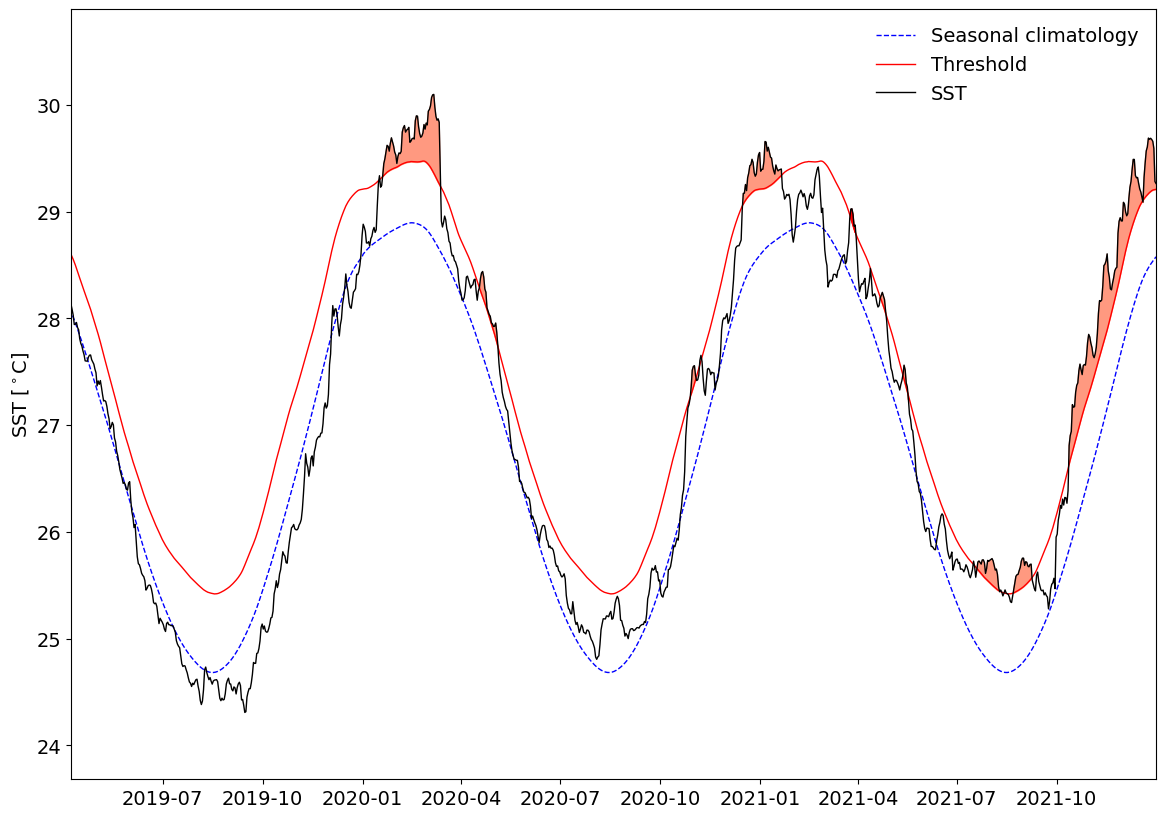

In [23]:
plt.figure(figsize=(14, 10))
plt.rc('font', size=14)

p1, = plt.plot(SST_spatial_average["time"], rolling_clim_seas, 'b--', linewidth=1, zorder=1)
p2, = plt.plot(SST_spatial_average["time"], rolling_clim_thresh, 'r', linewidth=1, zorder=2)
p3, = plt.plot(SST_spatial_average["time"], SST_time_series, 'k', linewidth=1, zorder=3)

# Find indices for previous MHW and shade
for ev0 in np.arange(ev-10, min(ev+10, n_events), 1):
    t1 = np.where(SST_spatial_average["time"]==mhws['time_start'][ev0].values)[0][0]
    t2 = np.where(SST_spatial_average["time"]==mhws['time_end'][ev0].values)[0][0]
    if ev0 == ev:
        plot_col = 'r'
    else:
        plot_col = (1,0.6,0.5)
    plt.fill_between(np.array(dates[t1:t2+1]), rolling_clim_thresh[t1:t2+1], np.array(SST_time_series[t1:t2+1]), \
                     color=plot_col)

plt.xlim(SST_spatial_average["time"][-1000], SST_spatial_average["time"][-1])
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + 2)
plt.ylabel(r'SST [$^\circ$C]')
plt.legend([p1, p2, p3],["Seasonal climatology", "Threshold", "SST"], frameon=False)
plt.savefig('Marine_heat_waves_GBR.png', bbox_inches='tight')

This is just an example of the sorts of analyses that can be developed with SST data for marine heatwaves. The diversity of data available through Copernicus programme allows for the investigation of this phenomena at both the event and climate scales. To extend this analysis you could use a longer time series of data to determine climate related trends. You could also routinely compare NRT data to a climatology (with the caveat of greater uncertainty associated with the NRT data source) for any region of interest to investigate it's current MHW status.

<hr>
<a href="../../../Index.ipynb"><< Index</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>